In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

In [15]:
df.isna().any()

rowid                False
kepid                False
kepoi_name           False
kepler_name          False
koi_disposition      False
koi_pdisposition     False
koi_score            False
koi_fpflag_nt        False
koi_fpflag_ss        False
koi_fpflag_co        False
koi_fpflag_ec        False
koi_period           False
koi_period_err1      False
koi_period_err2      False
koi_time0bk          False
koi_time0bk_err1     False
koi_time0bk_err2     False
koi_impact           False
koi_impact_err1      False
koi_impact_err2      False
koi_duration         False
koi_duration_err1    False
koi_duration_err2    False
koi_depth            False
koi_depth_err1       False
koi_depth_err2       False
koi_prad             False
koi_prad_err1        False
koi_prad_err2        False
koi_teq              False
koi_insol            False
koi_insol_err1       False
koi_insol_err2       False
koi_model_snr        False
koi_tce_plnt_num     False
koi_tce_delivname    False
koi_steff            False
k

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 9540
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              2269 non-null   int64  
 1   kepid              2269 non-null   int64  
 2   kepoi_name         2269 non-null   object 
 3   kepler_name        2269 non-null   object 
 4   koi_disposition    2269 non-null   object 
 5   koi_pdisposition   2269 non-null   object 
 6   koi_score          2269 non-null   float64
 7   koi_fpflag_nt      2269 non-null   int64  
 8   koi_fpflag_ss      2269 non-null   int64  
 9   koi_fpflag_co      2269 non-null   int64  
 10  koi_fpflag_ec      2269 non-null   int64  
 11  koi_period         2269 non-null   float64
 12  koi_period_err1    2269 non-null   float64
 13  koi_period_err2    2269 non-null   float64
 14  koi_time0bk        2269 non-null   float64
 15  koi_time0bk_err1   2269 non-null   float64
 16  koi_time0bk_err2   2269 

# Select your features (columns)

In [16]:
# Set features. This will also be used as your x values.
selected_features = df[['kepid', 'koi_period', 'koi_slogg', 'koi_score', 
                        'koi_steff','koi_srad','koi_kepmag','koi_time0bk',
                        'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
                        'koi_teq', 'koi_insol', 'koi_model_snr', 'ra', 'dec']]

selected_features.head()

,kepid,koi_period,koi_slogg,koi_score,koi_steff,koi_srad,koi_kepmag,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,ra,dec
0,10797460,9.488036,4.467,1.000,5455.0,0.927,15.347,170.53875,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,291.93423,48.141651
1,10797460,54.418383,4.467,0.969,5455.0,0.927,15.347,162.51384,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,291.93423,48.141651
4,10854555,2.525592,4.438,1.000,6031.0,1.046,15.509,171.59555,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,288.75488,48.226200
5,10872983,11.094321,4.486,1.000,6046.0,0.972,15.714,171.20116,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,296.28613,48.224670
6,10872983,4.134435,4.486,1.000,6046.0,0.972,15.714,172.97937,0.762,3.1402,686.0,2.77,1160.0,427.65,40.2,296.28613,48.224670


# Create a Train Test Split

Use `koi_disposition` for the y values

In [17]:
target = df['koi_disposition']
target_names = ['CONFIRMED','FALSE POSITIVE','CANDIDATE']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [19]:
X_train.head()

,kepid,koi_period,koi_slogg,koi_score,koi_steff,koi_srad,koi_kepmag,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,ra,dec
5356,9517393,219.321556,4.476,1.0,6063.0,1.012,15.273,320.728620,0.244,12.4124,3628.7,6.11,313.0,2.27,93.8,287.47763,46.141178
1851,4458082,4.893365,4.304,1.0,6688.0,1.347,13.827,133.644900,0.218,3.4850,138.3,1.60,1374.0,842.45,15.9,289.74731,39.523453
2202,9837685,13.712185,4.562,1.0,5550.0,0.831,15.935,135.518750,0.680,2.4370,786.7,2.47,676.0,49.26,22.6,294.53354,46.618271
2949,9115800,4.454194,4.425,1.0,5359.0,0.915,14.995,172.820223,0.479,2.3061,16042.0,11.76,1017.0,252.22,1022.2,299.90591,45.439678
771,7831264,5.968724,4.173,1.0,6122.0,1.439,13.717,137.158607,0.166,3.6510,510.6,3.26,1251.0,579.90,107.1,294.74207,43.536831


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [20]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 0.999/1.000
k: 5, Train/Test Score: 0.999/1.000
k: 7, Train/Test Score: 0.999/1.000
k: 9, Train/Test Score: 0.999/1.000
k: 11, Train/Test Score: 0.999/1.000
k: 13, Train/Test Score: 0.999/1.000
k: 15, Train/Test Score: 0.999/1.000
k: 17, Train/Test Score: 0.999/1.000
k: 19, Train/Test Score: 0.999/1.000


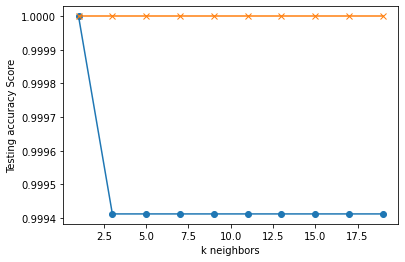

In [21]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [22]:
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

NameError: name 'clf' is not defined

In [24]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 1.000


[(0.3666471206330007, 'TransitDepth[ppm]'),
 (0.17819415474823772, 'StellarRadius[Solarradii]'),
 (0.16799582213094125, 'StellarSurfaceGravity[log10(cm/s**2)'),
 (0.14437824452635012, 'Kepler-band[mag]'),
 (0.0652679522594473, 'OrbitalPeriod[days]'),
 (0.039093719816163365, 'KepID'),
 (0.03842298588585966, 'StellarEffectiveTemperature[K]')]

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)